In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge,Lasso  
from sklearn.metrics import r2_score,mean_absolute_error    
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [22]:
df=pd.read_csv("data/stud.csv")
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
#prepare x,y-independent adn dependent
x=df.drop(columns="math_score",axis=1)
y=df["math_score"]


In [24]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [25]:
x=preprocessor.fit_transform(x)
x.shape

(1000, 19)

In [28]:
#split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Train Shape:",x_train.shape)
print("Test Shape:", x_test.shape)

Train Shape: (800, 19)
Test Shape: (200, 19)


In [29]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [32]:
from sklearn.ensemble import AdaBoostRegressor
models={
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for name, mdl in models.items():
    # Train model
    mdl.fit(x_train, y_train)

    # Make predictions
    y_train_pred = mdl.predict(x_train)
    y_test_pred = mdl.predict(x_test)

    # Evaluate
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(name)
    model_list.append(name)

    print("Model performance for train set")
    print(f"Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"Mean Absolute Error: {model_train_mae:.4f}")
    print(f"R2 score: {model_train_r2:.4f}")
    print("------------------------------------------------")
    print("Model performance for test set")
    print(f"Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"Mean Absolute Error: {model_test_mae:.4f}")
    print(f"R2 score: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)
    print("="*35 + "\n")


Linear Regression
Model performance for train set
Root Mean Squared Error: 5.3231
Mean Absolute Error: 4.2667
R2 score: 0.8743
------------------------------------------------
Model performance for test set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2 score: 0.8804

Lasso
Model performance for train set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 score: 0.8071
------------------------------------------------
Model performance for test set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 score: 0.8253

Ridge
Model performance for train set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2 score: 0.8743
------------------------------------------------
Model performance for test set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 score: 0.8806

KNeighborsRegressor
Model performance for train set
Root Mean Squared Error: 5.7079
Mean Absolute Error: 4.5168
R2 score: 0.8555
----------------------------------------

In [33]:
#predict
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model", "R2_Score"]).sort_values(by="R2_Score", ascending=False)

,Model,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,RandomForestRegressor,0.850229
8,AdaBoost Regressor,0.848155
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.728608


In [42]:
import os
import joblib

save_dir = "savedmodel"
os.makedirs(save_dir, exist_ok=True)


# Train, evaluate, and save each model
for name, mdl in models.items():
    mdl.fit(x_train, y_train)  
    
    # Save model to file
    filename = os.path.join(save_dir, f"{name.replace(' ', '_')}.pkl")
    joblib.dump(mdl, filename)
    print(f"Saved {name} at {filename}")

Saved Linear Regression at savedmodel\Linear_Regression.pkl
Saved Lasso at savedmodel\Lasso.pkl
Saved Ridge at savedmodel\Ridge.pkl
Saved KNeighborsRegressor at savedmodel\KNeighborsRegressor.pkl
Saved DecisionTreeRegressor at savedmodel\DecisionTreeRegressor.pkl
Saved RandomForestRegressor at savedmodel\RandomForestRegressor.pkl
Saved XGBRegressor at savedmodel\XGBRegressor.pkl
Saved CatBoosting Regressor at savedmodel\CatBoosting_Regressor.pkl
Saved AdaBoost Regressor at savedmodel\AdaBoost_Regressor.pkl


## linear reg best

In [34]:
lin_model=LinearRegression()
lin_model=lin_model.fit(x_train, y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test, y_pred)*100
print("Accuracy of the Model is %.2f" %score)

Accuracy of the Model is 88.04


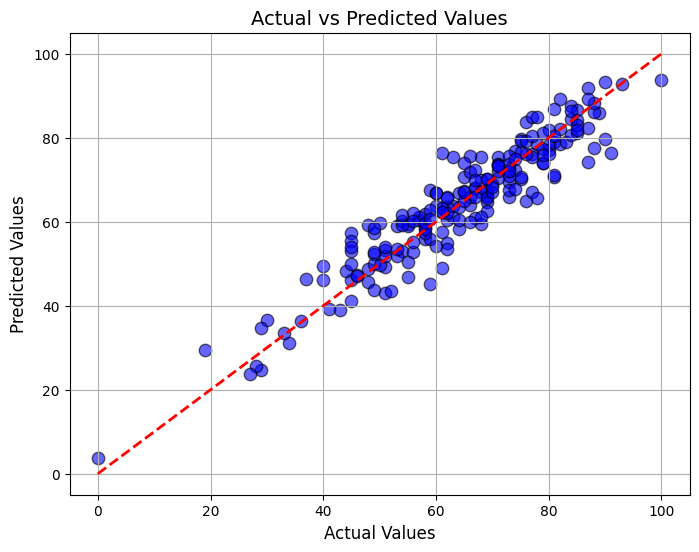

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', s=80)  # scatter points

# Plot a diagonal line for perfect prediction
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.grid(True)
plt.show()

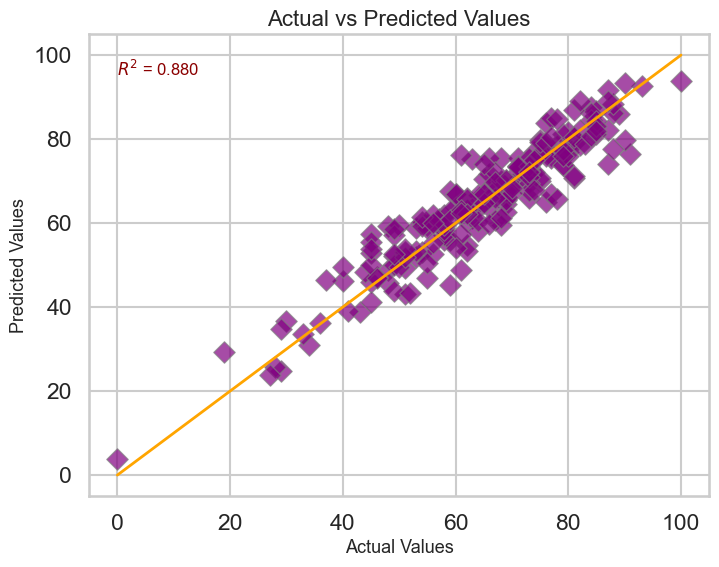

In [40]:
sns.set_style("whitegrid")  
sns.set_context("talk")     

# Compute R² score
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8,6))

# Scatter plot with a new color and style
sns.scatterplot(
    x=y_test, 
    y=y_pred, 
    color='purple', 
    s=120, 
    alpha=0.7, 
    edgecolor='gray', 
    marker='D'  # Diamond marker
)

# Perfect prediction line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='orange', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel("Actual Values", fontsize=13)
plt.ylabel("Predicted Values", fontsize=13)
plt.title("Actual vs Predicted Values", fontsize=16)

# Annotate R²
plt.text(min_val, max_val*0.95, f"$R^2$ = {r2:.3f}", fontsize=12, color='darkred')

plt.show()


In [50]:
import shutil

source_dir = "savedmodel"
source_model = "Linear_Regression.pkl"
original_model_path = os.path.join(source_dir, source_model)

final_model_dir = "final_model"
os.makedirs(final_model_dir, exist_ok=True)
final_model_path = os.path.join(final_model_dir, source_model)

shutil.copy(original_model_path, final_model_path)
print(f"Linear Regression model copied to {final_model_path}")

Linear Regression model copied to final_model\Linear_Regression.pkl
